In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from utils import load_data, train_svm, compute_accuracy

In [2]:
df = pd.read_excel('数据科学实践Data/LC-UKM.xlsx', header=2, usecols=[0, 1, 2, 3, 4, 5])
df[' UNS'] = pd.factorize(df[' UNS'])[0]

In [3]:
features = df.drop(columns=' UNS')
labels = df[' UNS']

In [4]:
train_features, test_val_features, train_labels, test_val_labels = train_test_split(features, labels, train_size=0.5, stratify=labels)
val_features, test_features, val_labels, test_labels = train_test_split(test_val_features, test_val_labels, train_size=0.6, stratify=test_val_labels)

In [5]:
features.shape

(403, 5)

In [6]:
labels.value_counts()

 UNS
2    129
3    122
1    102
4     26
0     24
Name: count, dtype: int64

In [7]:
batch_size = 128
train_iter, _, _ = load_data(batch_size, train_features, train_labels)
val_iter, _, _ = load_data(batch_size, train_features, train_labels)
test_X, test_y = torch.tensor(test_features.values).float(), torch.tensor(test_labels.values)
test_X = (test_X - test_X.mean(dim=0)) / test_X.std(dim=0)


In [8]:
net = nn.Linear(5, 5)
num_epochs, lr, weight_decay = 1000, 0.01, 0.0001
train_loss, val_loss, train_acc, val_acc, net = train_svm(num_epochs, net, lr, weight_decay, train_iter, val_iter)

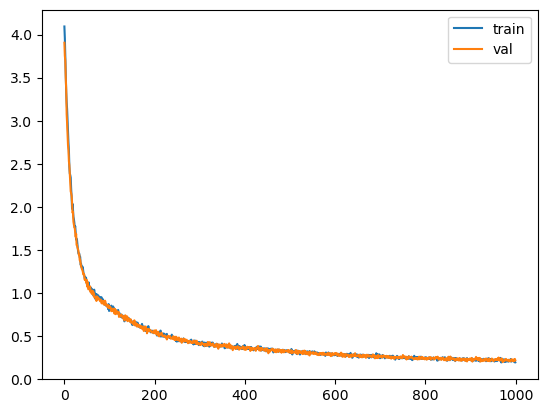

In [9]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.show()

In [10]:
[i for i in net.parameters()]

[Parameter containing:
 tensor([[ 0.1094, -0.2223, -0.0975, -1.4265, -5.1869],
         [ 0.1775,  0.4562,  0.1460,  1.3629,  4.1580],
         [ 0.0511,  0.1391, -0.1379, -0.6364, -2.1582],
         [ 0.1818,  0.3613,  0.0498,  0.3363,  1.0791],
         [-0.7244,  0.3570, -0.3966, -2.1683, -4.5376]], requires_grad=True),
 Parameter containing:
 tensor([-2.1323,  0.2728,  1.7986,  2.5136, -2.2259], requires_grad=True)]

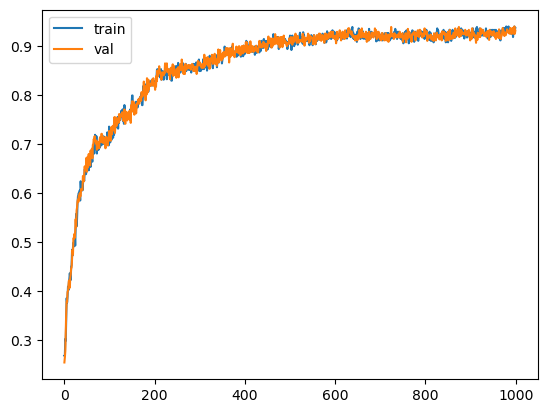

In [11]:
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.show()

In [12]:
lr_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
net = nn.Linear(5, 5)
num_epochs, weight_decay, batch_size = 1000, 0.0001, 128

In [13]:
div = {}
for lr in lr_list:
    train_loss, train_acc, val_loss, val_acc, net = train_svm(num_epochs, net, lr, weight_decay, train_iter, val_iter)
    div[lr] = [val_acc[-1], net]

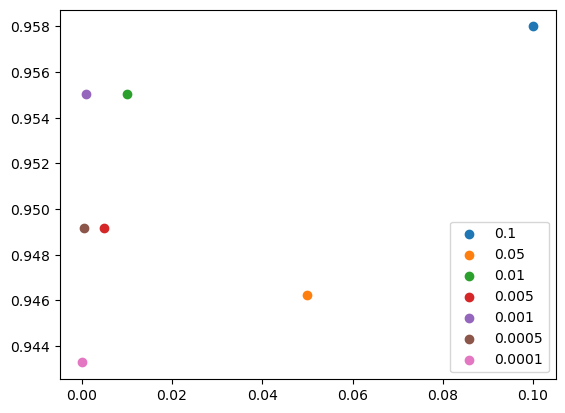

In [14]:
for lr in lr_list:
    plt.scatter(lr, div[lr][0], label=lr)
plt.legend()
plt.show()

In [15]:
net = div[0.0005][1]

In [16]:
[i for i in net.parameters()]

[Parameter containing:
 tensor([[  0.7167,  -1.0944,  -0.5425,  -3.3966, -15.1810],
         [ -0.6357,   1.2067,   1.5926,   5.0366,  19.6794],
         [ -0.2342,  -0.4065,  -0.0921,  -0.5150,  -2.6303],
         [ -0.1134,   0.0322,   0.5986,   1.9953,  10.1093],
         [ -0.4250,  -0.2999,  -0.8386,  -4.4311, -12.0194]],
        requires_grad=True),
 Parameter containing:
 tensor([-9.1774,  2.9666,  5.2445, 10.4767, -6.5502], requires_grad=True)]

In [17]:
compute_accuracy(net, test_X, test_y)

0.9012345671653748